In [346]:
import pandas as pd
import numpy as np
import sklearn
from numpy import linalg as LA
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict



n=1000
q=1
SNR=8


def generate_data(n,p,SNR):
    
    #Generating coefficients beta
    beta=np.random.rand(q)

    X=np.random.rand(n,q)
    
    f=np.sinc(X**2+3*X)*np.sin(X)**2
    
    #Generating standard deviation, based on wanted SNR level gamma
    gamma=SNR
    sigma = np.sqrt(LA.norm(f.dot(beta))**2/(n-1))/gamma
    
    #Generating residuals
    epsilon=np.random.normal(0, sigma, n)
    
    #Generating responses
    y=f.dot(beta)+epsilon
    
    return X,y,f,beta,epsilon,sigma,gamma

X,y,f,beta,epsilon,sigma,gamma = generate_data(n,q,SNR)
SNR_true = np.linalg.norm(f.dot(beta)) / np.linalg.norm(epsilon)

print(SNR_true)

8.2712240326562


Best R2 score for the linear kernel is 0.036 with parameter (lambda) {'alpha': 10}
Mean squared Error MSE linear: 0.00037814248082195293


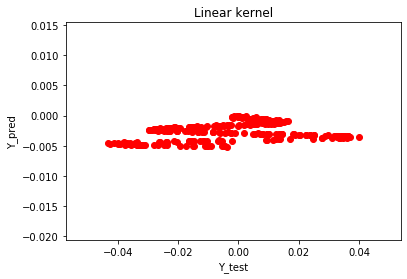

Best R2 score for the poly kernel is 0.084 with parameter (lambda and gamma) {'alpha': 1.0, 'coef0': 3, 'gamma': 3}
Mean squared Error MSE poly: 0.00035911067514048534


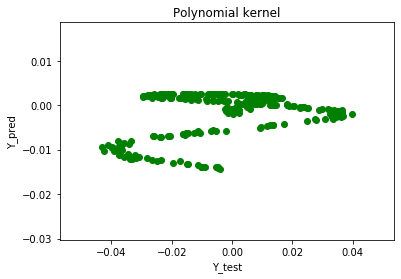

Best R2 score for the Gaussian kernel is 0.758 with parameter (lambda and sigma) {'alpha': 0.01, 'gamma': 3}
Mean squared Error MSE gauss: 9.503971427398867e-05


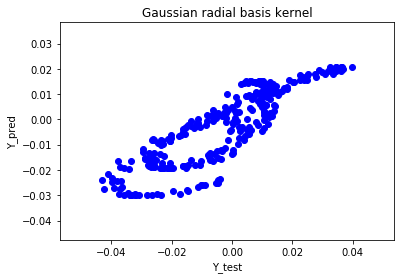

In [347]:
#different kernels 
def linear_kernel(x,x_prime):
    return (np.transpose(x).dot(x_prime))

def poly_kernel(x,x_prime,gamma,r,m):
    return (float((gamma*(np.transpose(x)*(x_prime))+r)**m))

def gaussian_kernel(x,x_prime,sigma):
    return (np.exp(-sum((x-x_prime)**2)/2*sigma**2))

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#linear
grid_linear=GridSearchCV(KernelRidge(kernel='linear'), param_grid={"alpha":[1e0, 0.1, 1e-2, 10, 20]}, cv=5)
grid_linear.fit(X_train,Y_train)
grid_linear.best_score_
#Parameter setting that gave the best results on the hold out data.
grid_linear.best_params_
y_pred_lin=grid_linear.predict(X_test)
#R2 value of regression model defines how close the data is to the regression line 
#and the value should be closer to 1.
score=sklearn.metrics.r2_score(Y_test, y_pred_lin)
print('Best R2 score for the linear kernel is',round(score,3), 'with parameter (lambda)', grid_linear.best_params_)

print('Mean squared Error MSE linear:', metrics.mean_squared_error(Y_test, y_pred_lin))# calculating MSE
plt.scatter(Y_test,y_pred_lin, color='red')
plt.title('Linear kernel')
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.show()
#print(score)

#polynomial
grid_polynomial= GridSearchCV(KernelRidge(kernel="polynomial", degree=2, gamma=0.1), cv=5,param_grid={"alpha": [1e0, 0.1, 1e-5, 10, 20],"gamma":[0.001,0.0001,0.01,0.1,1,0.5,2,3], "coef0":[0,1,2,3,4,5,6,7]})
grid_polynomial.fit(X_train,Y_train)
grid_polynomial.best_params_
y_pred_poly=grid_polynomial.predict(X_test)
score_poly=sklearn.metrics.r2_score(Y_test, y_pred_poly)
print('Best R2 score for the poly kernel is',round(score_poly,3), 'with parameter (lambda and gamma)', grid_polynomial.best_params_)
print('Mean squared Error MSE poly:', metrics.mean_squared_error(Y_test, y_pred_poly))# calculating MSE
plt.scatter(Y_test,y_pred_poly, color='green')
plt.title('Polynomial kernel')
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.show()
#print(score_poly)

#gaussian
grid_gaussian= GridSearchCV(KernelRidge(kernel="rbf", gamma=0.1),cv=5,param_grid={"alpha": [1e0, 0.1, 1e-2, 10, 20],"gamma":[0.001,0.0001,0.01,0.1,1,0.5,2,3]})
grid_gaussian.fit(X_train,Y_train)
grid_gaussian.best_params_
y_pred_gauss=grid_gaussian.predict(X_test)
score_gauss=sklearn.metrics.r2_score(Y_test, y_pred_gauss)
print('Best R2 score for the Gaussian kernel is',round(score_gauss,3), 'with parameter (lambda and sigma)', grid_gaussian.best_params_)
print('Mean squared Error MSE gauss:', metrics.mean_squared_error(Y_test, y_pred_gauss))# calculating MSE
plt.scatter(Y_test,y_pred_gauss, color='blue')
plt.title('Gaussian radial basis kernel')
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.show()




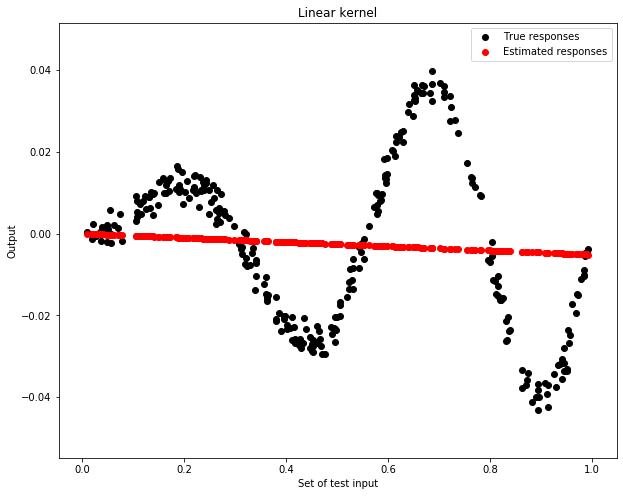

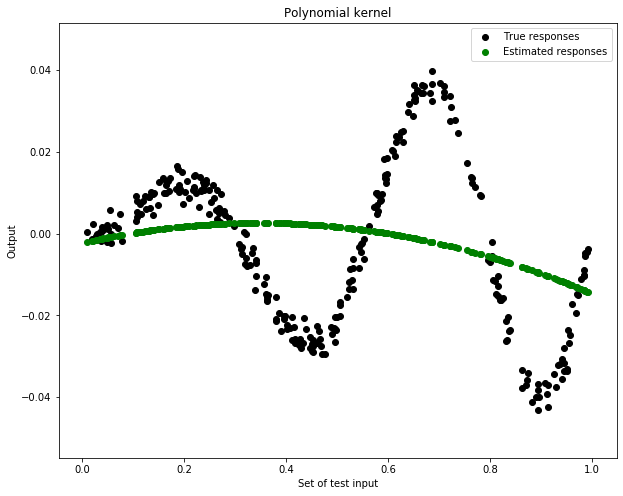

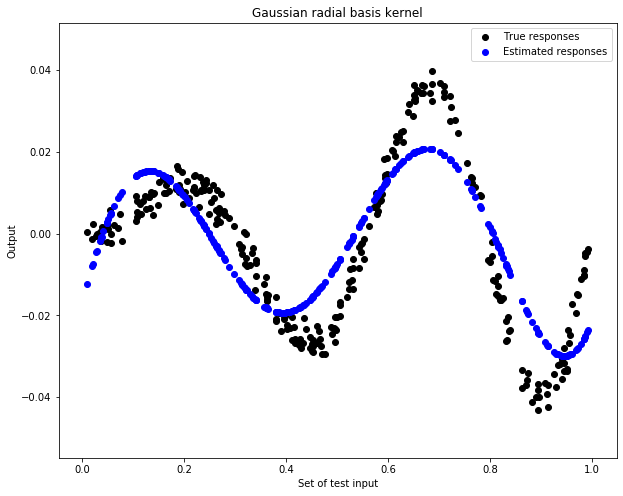

In [348]:
plt.figure(figsize=(10,8)) 
plt.scatter(X_test[:,0],Y_test, color='black', label='True responses')
plt.scatter(X_test[:,0],y_pred_lin, color='red', label='Estimated responses')
plt.xlabel('Set of test input')
plt.ylabel('Output')
plt.title('Linear kernel')
plt.legend()
plt.show()


plt.figure(figsize=(10,8)) 
plt.scatter(X_test[:,0],Y_test, color='black', label='True responses')
plt.scatter(X_test[:,0],y_pred_poly, color='green', label='Estimated responses')
plt.xlabel('Set of test input')
plt.ylabel('Output')
plt.title('Polynomial kernel')
plt.legend()
plt.show()

plt.figure(figsize=(10,8)) 
plt.scatter(X_test[:,0],Y_test, color='black', label='True responses')
plt.scatter(X_test[:,0],y_pred_gauss, color='blue', label='Estimated responses')
plt.xlabel('Set of test input')
plt.ylabel('Output')
plt.title('Gaussian radial basis kernel')
plt.legend()
plt.show()

In [349]:
max_iter = 10

MSE_linear=[]
MSE_polynomial=[]
MSE_gaussian=[]

r2_linear=[]
r2_poly=[]
r2_gauss=[]

for i in range(max_iter):

    X,y,f,beta,epsilon,sigma,gamma = generate_data(n,q,SNR)
    X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    #linear
    grid_linear=GridSearchCV(KernelRidge(kernel='linear'), param_grid={"alpha":[1e0, 0.1, 1e-2, 10, 20]}, cv=5)
    grid_linear.fit(X_train,Y_train)
    grid_linear.best_score_
    grid_linear.best_params_
    y_pred_lin=grid_linear.predict(X_test)
    score=sklearn.metrics.r2_score(Y_test, y_pred_lin)
    
    r2_linear.append(score)
    MSE_linear.append(metrics.mean_squared_error(Y_test, y_pred_lin))# calculating MSE
    


    #polynomial
    grid_polynomial= GridSearchCV(KernelRidge(kernel="polynomial", degree=2, gamma=0.1), cv=5,param_grid={"alpha": [1e0, 0.1, 1e-5, 10, 20],"gamma":[0.001,0.0001,0.01,0.1,1,0.5,2,3], "coef0":[0,1,2,3,4,5,6,7]})
    grid_polynomial.fit(X_train,Y_train)
    grid_polynomial.best_params_
    y_pred_poly=grid_polynomial.predict(X_test)
    score_poly=sklearn.metrics.r2_score(Y_test, y_pred_poly)
    
    r2_poly.append(score_poly)
    MSE_polynomial.append(metrics.mean_squared_error(Y_test, y_pred_poly))# calculating MSE


    #gaussian
    grid_gaussian= GridSearchCV(KernelRidge(kernel="rbf", gamma=0.1),cv=5,param_grid={"alpha": [1e0, 0.1, 1e-5, 10, 20],"gamma":[0.001,0.0001,0.01,0.1,1,0.5,2,3]})
    grid_gaussian.fit(X_train,Y_train)
    grid_gaussian.best_params_
    y_pred_gauss=grid_gaussian.predict(X_test)
    score_gauss=sklearn.metrics.r2_score(Y_test, y_pred_gauss)
    
    r2_gauss.append(score_gauss)
    MSE_gaussian.append(metrics.mean_squared_error(Y_test, y_pred_gauss)) # calculating MSE
    

print('Averaged MSE for linear kernel is:', round(np.mean(MSE_linear),10))
print('Averaged MSE for polynomial kernel is:',round(np.mean(MSE_polynomial),10))
print('Averaged MSE for gaussian kernel is:',round(np.mean(MSE_gaussian),10))


print('Averaged r2 score for linear kernel is:', round(np.mean(r2_linear),3))
print('Averaged r2 score for polynomial kernel is:',round(np.mean(r2_poly),3))
print('Averaged r2 score for gaussian kernel is:',round(np.mean(r2_gauss),3))

Averaged MSE for linear kernel is: 0.0002388709
Averaged MSE for polynomial kernel is: 0.0002280173
Averaged MSE for gaussian kernel is: 6.8908e-06
Averaged r2 score for linear kernel is: 0.027
Averaged r2 score for polynomial kernel is: 0.074
Averaged r2 score for gaussian kernel is: 0.973
